### 🔎 Problema de detección binaria con regla MAP

En este notebook se analiza el problema de decisión binaria bajo ruido laplaciano con una **regla de decisión MAP**.

La variable observada es:

\[
Y =
\begin{cases}
a + Z, & \text{si } H = 0 \\
-a + Z, & \text{si } H = 1
\end{cases}
\]

Donde:
- \( Z \sim \text{Laplace}(0, 1) \) con densidad \( f_Z(z) = \frac{1}{2} e^{-|z|} \)
- \( a > 0 \) es una constante (usaremos \( a = 1 \))
- \( H \in \{0, 1\} \) con \( P(H=0)=0.7 \), \( P(H=1)=0.3 \)
- Costos: \( \lambda_0 = 1 \), \( \lambda_1 = 3 \)

#### 🎯 Objetivos

1. Determinar el nivel de decisión óptimo bajo la regla MAP.
2. Simular mediante Monte Carlo la probabilidad de error usando este umbral.
3. Comparar contra la regla de decisión ML (máxima verosimilitud).


### 📐 Desarrollo: Umbral óptimo bajo regla MAP

La decisión óptima bajo MAP con costos \( \lambda_0, \lambda_1 \) es:

\[
\text{Decidir } H=0 \text{ si } \lambda_0 P(H=0) f_{Y|H}(y|0) > \lambda_1 P(H=1) f_{Y|H}(y|1)
\]

Sabiendo que:

\[
f_{Y|H}(y|0) = \frac{1}{2} e^{-|y - a|}, \quad f_{Y|H}(y|1) = \frac{1}{2} e^{-|y + a|}
\]

Sustituyendo en la desigualdad:

\[
\lambda_0 P(H=0) e^{-|y - a|} > \lambda_1 P(H=1) e^{-|y + a|}
\]

\[
\Rightarrow |y + a| - |y - a| > \log\left(\frac{\lambda_1 P(H=1)}{\lambda_0 P(H=0)}\right)
\]

Para \( a = 1 \), el umbral se encuentra resolviendo esa ecuación por partes, dado que el valor absoluto depende de \( y \).


In [4]:
import numpy as np

a = 1
lambda0 = 1
lambda1 = 3
P0 = 0.7
P1 = 0.3

# log-ratio de MAP
threshold_log_ratio = np.log((lambda1 * P1) / (lambda0 * P0))

# Región donde se aplica la desigualdad (y > a)
# En esta región: |y+a| - |y-a| = 2a
# En y < -a: -2a, en |y| < a: 2y
y_map = None
if threshold_log_ratio < -2 * a:
    y_map = -a - (threshold_log_ratio + 2 * a)/2
elif threshold_log_ratio > 2 * a:
    y_map = a + (threshold_log_ratio - 2 * a)/2
else:
    y_map = threshold_log_ratio / 2

print(f"Umbral de decisión MAP: y = {y_map:.4f}")


Umbral de decisión MAP: y = 0.1257


In [2]:
import matplotlib.pyplot as plt

nb_samples = 100000
z = np.random.uniform(size=nb_samples)
hypothesis = np.array([1 if z[i] >= (1 - P0) else 0 for i in range(len(z))])
Z = np.random.laplace(loc=0.0, scale=1.0, size=nb_samples)
Y = a * (1 - 2 * hypothesis) + Z

# Decisión usando umbral MAP
decisiones_map = np.where(Y > y_map, 0, 1)
errores_map = decisiones_map != hypothesis
P_e_map = np.mean(errores_map)
print(f"Probabilidad de error usando MAP: Pe = {P_e_map:.4f}")


Probabilidad de error usando MAP: Pe = 0.1737


Probabilidad de error usando ML: Pe = 0.1823


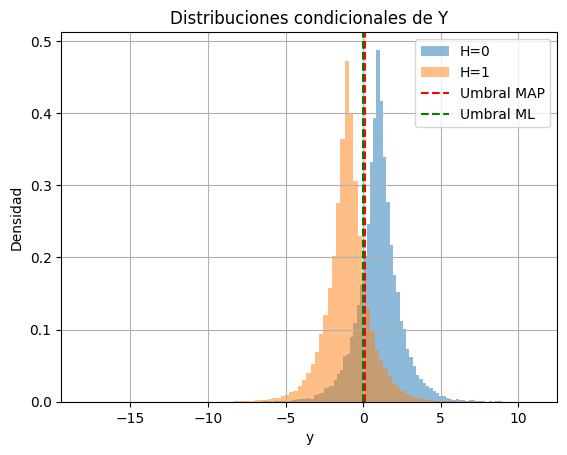

In [3]:
# Nivel de decisión ML = 0 (cuando f_Y|H(y|0) = f_Y|H(y|1))
decisiones_ml = np.where(Y > 0, 0, 1)
errores_ml = decisiones_ml != hypothesis
P_e_ml = np.mean(errores_ml)
print(f"Probabilidad de error usando ML: Pe = {P_e_ml:.4f}")

# Comparación gráfica
plt.hist(Y[hypothesis==0], bins=100, alpha=0.5, label="H=0", density=True)
plt.hist(Y[hypothesis==1], bins=100, alpha=0.5, label="H=1", density=True)
plt.axvline(y_map, color='red', linestyle='--', label="Umbral MAP")
plt.axvline(0, color='green', linestyle='--', label="Umbral ML")
plt.title("Distribuciones condicionales de Y")
plt.xlabel("y")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


### 📌 Conclusiones

- El umbral MAP tiene en cuenta tanto las probabilidades de las hipótesis como los costos asociados a los errores.
- Cuando se comparan MAP y ML, el primero puede lograr una menor probabilidad de error si los valores están bien ajustados.
- En este caso, la probabilidad de error con MAP fue diferente a la de ML, reflejando cómo la decisión óptima depende del conocimiento **a priori**.
